In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('data2.csv')

In [2]:
# 筛选出账户为空值的行
null_account_data = data[data['Account No'].isnull()]

# 创建一个新列 'Income_Expense',表示该笔交易是收入还是支出
null_account_data['Income_Expense'] = null_account_data['Amount'].apply(lambda x: 'Income' if x > 0 else 'Expense')

# 计算空值账户的支出笔数
null_account_expense_count = null_account_data['Income_Expense'].value_counts().get('Expense', 0)

# 查看结果
print(f"空值账户的支出笔数: {null_account_expense_count}")

# 计算日期为空值的消费笔数
date_null_count = data['Date'].isnull().sum()

# 计算金额为空值的消费笔数
amount_null_count = data['Amount'].isnull().sum()

# 计算时间戳为空值的消费笔数
timestamp_null_count = data['Timestamp'].isnull().sum()

print(f"日期为空值的消费笔数: {date_null_count}")
print(f"金额为空值的消费笔数: {amount_null_count}")
print(f"时间戳为空值的消费笔数: {timestamp_null_count}")

空值账户的支出笔数: 215
日期为空值的消费笔数: 229
金额为空值的消费笔数: 209
时间戳为空值的消费笔数: 251


In [3]:
data = data.dropna(subset=['Account No', 'Date', 'Timestamp', 'Amount'])

In [4]:
# 检查数据的行数和列数
print("数据维度: ", data.shape)

# 检查数据的前5行
print("数据预览:")
print(data.head())

# 检查数据类型
print("数据类型:")
print(data.info())

# 检查缺失值
print("缺失值检查:")
print(data.isnull().sum())

# 如果有缺失值,可以根据情况进行处理,例如填充0
data.fillna(0, inplace=True)

# 检查是否有重复行
print("重复行检查:")
print(data.duplicated().sum())

# 如果有重复行,可以直接删除
data.drop_duplicates(inplace=True)

# 再次检查数据的行数和列数
print("处理后的数据维度: ", data.shape)

数据维度:  (229684, 7)
数据预览:
         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023      0:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023      0:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023      0:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023      0:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023      0:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face  
数据类型:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 229684 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    229684 non-null  object 
 1   Timestamp               229684 non-null  object 
 2   Account

In [5]:
# 将 Balance 列约为两位小数
data['Balance'] = data['Balance'].round(2)

# 检查处理后的数据
print(data.head())

         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023      0:00  678330503.0   2971.0  1584.0                     0.0   
1  01/01/2023      0:00  472213568.0   3792.0  1950.0                     0.0   
2  01/01/2023      0:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023      0:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023      0:00  624500124.0   3226.0  1825.0                     0.0   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                   0  
3                   0  
4            Fat Face  


In [6]:
# 创建一个新列 'Income_Expense',表示该笔交易是收入还是支出
data['Income_Expense'] = data['Amount'].apply(lambda x: 'Income' if x > 0 else 'Expense')

# 按照账户和收入/支出类型分组,计算每组的记录数
account_summary = data.groupby(['Account No', 'Income_Expense']).size().unstack(fill_value=0)

# 重命名列
account_summary.columns = ['Expense_Count', 'Income_Count']

# 重置索引
account_summary = account_summary.reset_index()

# 查看结果
print(account_summary.head())

    Account No  Expense_Count  Income_Count
0  101531259.0            110            11
1  104832000.0            150            14
2  105375973.0            147            11
3  106601471.0            180            11
4  108481285.0            345            23


In [7]:
# 获取所有不同的商户名称
merchant_names = set(data['Third Party Name'].dropna())

# 将商户名称转换为列表并排序
merchant_names = sorted(list(merchant_names), key=str)

# 打印商户名称列表
print("商户名称列表:")
for merchant in merchant_names:
    print(merchant)

商户名称列表:
0
A Cut Above
A Yarn Story
AMAZON
Amazon
Barbiee Boutique
Blackwell's
Blizzard
Boots
Brilliant Brushes
CPA
Cass Art
CeX
Coffee #1
Collector Cave
Coop Local
Costa Coffee
Craftastic
Deliveroo
Disney
Etsy
Fat Face
Fitted Stitch
Five Senses Art
Foyles
Frankie & Bennies
Gamestation
Gap Kids
Grand Union BJJ
Green Park
Green Park Academy
HMV
Halifax
Happy Days Home
Head
Hobby Lobby
Hobbycraft
JD Sports
Jollyes
JustEat
Kew House
Kings Arms
LBG
Lavender Fields
Lavender Primary
Lloyds Pharmacy
Loosely Fitted
Mamas & Papas
Matalan
Millets
Mojang Studios
Mothercare
Mountain Warehouse
Netflix
North Face
Pets Corner
Pets at Home
Premier Finance
PureGym
Reebok
Remedy plus care
Revella
Rose & Crown
RugbyFields
Sainsbury
Sainsbury Local
Selfridges
Specsavers
Sports Direct
SquareOnix
Starbucks
Stitch By Stitch
Sunny Care Nursery
Tesco
The Crown
The Works
Topshop
Town High
University College Hospital
Victoria Park
Vision Express
Westport Care Home
Wool
Xbox


In [8]:
merchant_categories = {
    'Retail/Shopping': [
        'A Cut Above', 'Barbiee Boutique', 'Boots', 'Cass Art', 'CeX', 'Fat Face', 'Fitted Stitch',
        'Foyles', 'Gap Kids', 'Happy Days Home', 'Head', 'HMV', 'JD Sports', 'Mamas & Papas',
        'Matalan', 'Millets', 'Mothercare', 'Mountain Warehouse', 'North Face', 'Reebok',
        'Sainsbury', 'Sainsbury Local', 'Selfridges', 'Sports Direct', 'Topshop', 'The Works',
        'Vision Express'
    ],
    'Crafts/Hobbies': [
        'A Yarn Story', 'Brilliant Brushes', 'Craftastic', 'Five Senses Art', 'Hobby Lobby',
        'Hobbycraft', 'Loosely Fitted', 'Stitch By Stitch', 'Wool'
    ],
    'Food/Dining': [
        'Coffee #1', 'Costa Coffee', 'Deliveroo', 'Frankie & Bennies', 'JustEat', 'Rose & Crown',
        'Starbucks', 'The Crown'
    ],
    'Pets': ['Jollyes', 'Pets Corner', 'Pets at Home'],
    'Entertainment/Gaming': [
        'Blizzard', 'Collector Cave', 'Disney', 'Gamestation', 'Mojang Studios', 'Netflix',
        'SquareOnix', 'Xbox'
    ],
    'Online Retail': ['AMAZON', 'Amazon', 'Etsy'],
    'Fitness/Sports': ['Grand Union BJJ', 'PureGym', 'RugbyFields'],
    'Healthcare': [
        'Lloyds Pharmacy', 'Remedy plus care', 'University College Hospital', 'Westport Care Home'
    ],
    'Financial Services': ['CPA', 'Halifax', 'LBG', 'Premier Finance'],
    'Education/Childcare': ['Green Park Academy', 'Kew House', 'Lavender Primary', 'Sunny Care Nursery'],
    'Others': [
        'Blackwell\'s', 'Coop Local', 'Green Park', 'Kings Arms', 'Lavender Fields', 'Revella',
        'Specsavers', 'Town High', 'Victoria Park'
    ]
}

def assign_merchant_category(merchant_name):
    for category, merchants in merchant_categories.items():
        if merchant_name in merchants:
            return category
    return 'Others'

# Apply the function to the "Third Party Name" column
data['Merchant Category'] = data['Third Party Name'].apply(assign_merchant_category)

# Count transactions for each merchant category
merchant_category_counts = data['Merchant Category'].value_counts()

# Print the merchant category statistics
print("Merchant Category Statistics:")
print(merchant_category_counts)

# Save the classified data to a CSV file
data.to_csv('Name.csv', index=False)
print("Classified transaction data saved to 'Name.csv'")

Merchant Category Statistics:
Retail/Shopping         70081
Others                  53067
Entertainment/Gaming    32192
Food/Dining             23068
Crafts/Hobbies          16854
Fitness/Sports          11939
Online Retail           11534
Financial Services       7050
Healthcare               2970
Education/Childcare       532
Pets                      397
Name: Merchant Category, dtype: int64
Classified transaction data saved to 'Name.csv'


In [9]:
import pandas as pd

# 计算每个商户类别的收入和支出统计
category_stats = data.groupby(['Merchant Category', 'Income_Expense']).agg({'Amount': ['min', 'max']})
category_stats.columns = ['_'.join(col) for col in category_stats.columns]
category_stats = category_stats.reset_index()

# 创建一个空的 DataFrame 来存储结果
result_df = pd.DataFrame(columns=['Merchant Category', 'Max Income', 'Min Income', 'Max Expense', 'Min Expense'])

# 遍历每个商户类别
for category in category_stats['Merchant Category'].unique():
    category_data = category_stats[category_stats['Merchant Category'] == category]
    
    # 获取收入的最大值和最小值
    max_income = category_data[category_data['Income_Expense'] == 'Income']['Amount_max'].values
    min_income = category_data[category_data['Income_Expense'] == 'Income']['Amount_min'].values
    
    # 获取支出的最大值和最小值
    max_expense = category_data[category_data['Income_Expense'] == 'Expense']['Amount_max'].values
    min_expense = category_data[category_data['Income_Expense'] == 'Expense']['Amount_min'].values
    
    # 将结果添加到 result_df
    result_df = result_df.append({
        'Merchant Category': category,
        'Max Income': max_income[0] if len(max_income) > 0 else 0,
        'Min Income': min_income[0] if len(min_income) > 0 else 0,
        'Max Expense': max_expense[0] if len(max_expense) > 0 else 0,
        'Min Expense': min_expense[0] if len(min_expense) > 0 else 0
    }, ignore_index=True)

# 打印结果
print(result_df)

       Merchant Category  Max Income  Min Income  Max Expense  Min Expense
0         Crafts/Hobbies     2970.00      1542.5        -0.02      -371.00
1    Education/Childcare     5292.80      2300.0       -80.00      -290.00
2   Entertainment/Gaming     2790.00      1655.0        -5.99      -230.00
3     Financial Services     5833.00      1625.0      -446.00     -1395.00
4         Fitness/Sports     3656.00      1788.0        -5.99      -234.98
5            Food/Dining     2083.30      1620.1        -2.80      -220.00
6             Healthcare     4779.00      1584.0         0.00      -220.00
7          Online Retail        0.00         0.0         0.00       -88.62
8                 Others    12240.00        10.0         0.00    -12240.00
9                   Pets     3333.33      1842.5      -210.00      -210.00
10       Retail/Shopping     4167.00      1243.8         0.00      -429.80


In [10]:
# 创建 "收入" 数据集
income_data = data.loc[data['Amount'] > 0].copy()

# 创建 "支出" 数据集
expense_data = data.loc[data['Amount'] < 0].copy()

# 将 "支出" 数据集中的金额从负数转换为正数
expense_data['Amount'] = expense_data['Amount'].abs()

# 将 "收入" 数据集保存为 CSV 文件
income_data.to_csv('income.csv', index=False)

# 将 "支出" 数据集保存为 CSV 文件
expense_data.to_csv('expense.csv', index=False)

print("数据集已成功分割并保存为 'income.csv' 和 'expense.csv'。")

数据集已成功分割并保存为 'income.csv' 和 'expense.csv'。


In [11]:
income = pd.read_csv('income.csv')

# 按照 "Merchant Category" 对数据进行分组,并计算 "Amount" 列的最大值和最小值
merchant_stats = income.groupby('Merchant Category')['Amount'].agg(['max', 'min'])

# 重命名列名
merchant_stats.columns = ['Max Amount', 'Min Amount']

print("\n统计结果:")
print(merchant_stats)


统计结果:
                      Max Amount  Min Amount
Merchant Category                           
Crafts/Hobbies           2970.00      1542.5
Education/Childcare      5292.80      2300.0
Entertainment/Gaming     2790.00      1655.0
Financial Services       5833.00      1625.0
Fitness/Sports           3656.00      1788.0
Food/Dining              2083.30      1620.1
Healthcare               4779.00      1584.0
Others                  12240.00        10.0
Pets                     3333.33      1842.5
Retail/Shopping          4167.00      1243.8


In [12]:
expense = pd.read_csv('expense.csv')

# 按照 "Merchant Category" 对数据进行分组,并计算 "Amount" 列的最大值和最小值
merchant_stats = expense_data.groupby('Merchant Category')['Amount'].agg(['max', 'min'])

# 重命名列名
merchant_stats.columns = ['Max Amount', 'Min Amount']

print("每个商户类型的金额统计:")
print(merchant_stats)

每个商户类型的金额统计:
                      Max Amount  Min Amount
Merchant Category                           
Crafts/Hobbies            371.00        0.02
Education/Childcare       290.00       80.00
Entertainment/Gaming      230.00        5.99
Financial Services       1395.00      446.00
Fitness/Sports            234.98        5.99
Food/Dining               220.00        2.80
Healthcare                220.00        0.01
Online Retail              88.62        0.01
Others                  12240.00        0.01
Pets                      210.00      210.00
Retail/Shopping           429.80        0.01


In [13]:
# 按照 "Account No" 对数据进行分组,并计算 "Amount" 列的各种统计量
account_stats = expense.groupby('Account No')['Amount'].agg(['max', 'min', 'mean', 'sum', 'median'])

# 重命名列名
account_stats.columns = ['Max Amount', 'Min Amount', 'Mean Amount', 'Total Amount', 'Median Amount']

print("每个账户的支出统计:")
print(account_stats)

每个账户的支出统计:
             Max Amount  Min Amount  Mean Amount  Total Amount  Median Amount
Account No                                                                   
101531259.0      859.00        1.50   160.250727      17627.58         88.580
104832000.0      861.00        1.06   167.436800      25115.52         49.920
105375973.0      268.79        3.61    68.665102      10093.77         48.030
106601471.0      320.60        0.04    43.111167       7760.01         19.965
108481285.0     1940.00        0.15    43.666899      15065.08         21.480
...                 ...         ...          ...           ...            ...
995615876.0      637.00        0.93   101.932197      17634.27         51.990
996042490.0     1500.00        0.48   145.135844      35268.01         34.970
998390769.0     1013.00        4.67   152.309643      21323.35         69.990
998405607.0      283.50        5.99    60.801103       8816.16         35.070
999752672.0      820.00        0.14    96.804652     

In [14]:
# 按照 "Account No" 对数据进行分组,并计算 "Amount" 列的各种统计量
account_stats = income.groupby('Account No')['Amount'].agg(['max', 'min', 'mean', 'sum', 'median'])

# 重命名列名
account_stats.columns = ['Max Amount', 'Min Amount', 'Mean Amount', 'Total Amount', 'Median Amount']

print("每个账户的收入统计:")
print(account_stats)

每个账户的收入统计:
             Max Amount  Min Amount  Mean Amount  Total Amount  Median Amount
Account No                                                                   
101531259.0      1542.5      1542.5  1542.500000       16967.5         1542.5
104832000.0      1675.0       160.0  1467.857143       20550.0         1675.0
105375973.0       900.0       900.0   900.000000        9900.0          900.0
106601471.0      1675.0      1675.0  1675.000000       18425.0         1675.0
108481285.0      1584.0       640.0  1091.478261       25104.0          640.0
...                 ...         ...          ...           ...            ...
995615876.0      1733.0      1733.0  1733.000000       19063.0         1733.0
996042490.0      3750.0      3750.0  3750.000000       41250.0         3750.0
998390769.0      1625.0      1625.0  1625.000000       19500.0         1625.0
998405607.0      1360.0       450.0   530.769231        6900.0          450.0
999752672.0      2708.0      2708.0  2708.000000     

In [15]:
# 从 "Date" 列创建 "Month" 列
expense['Month'] = pd.to_datetime(expense['Date']).dt.to_period('M')

# 计算每个账户每个月的支出统计
expense_stats = expense.groupby(['Account No', 'Month'])['Amount'].agg(['max', 'min', 'mean', 'sum', 'count'])
expense_stats.columns = ['Max Amount', 'Min Amount', 'Mean Amount', 'Total Amount', 'Total Count']
expense_stats = expense_stats.reset_index()

print("每个账户每个月的支出统计:")
print(expense_stats)

每个账户每个月的支出统计:
        Account No    Month  Max Amount  Min Amount  Mean Amount  \
0      101531259.0  2023-01      859.00        7.99   414.592143   
1      101531259.0  2023-02      104.84        1.50    62.996000   
2      101531259.0  2023-03      107.05        7.98    49.338571   
3      101531259.0  2023-04      169.50        7.99    82.145385   
4      101531259.0  2023-05      148.50        7.99    71.856923   
...            ...      ...         ...         ...          ...   
11615  999752672.0  2023-08      680.00        4.35    73.527222   
11616  999752672.0  2023-09      680.00        5.00    61.816190   
11617  999752672.0  2023-10      680.00        4.99    73.776842   
11618  999752672.0  2023-11      680.00        4.75    89.001500   
11619  999752672.0  2023-12       23.94        3.75     8.027143   

       Total Amount  Total Count  
0          11608.58           28  
1            314.98            5  
2            345.37            7  
3           1067.89          

In [16]:
income['Month'] = pd.to_datetime(income['Date']).dt.to_period('M')

# 计算每个账户每个月的收入统计
income_stats = income.groupby(['Account No', 'Month'])['Amount'].agg(['max', 'min', 'mean', 'sum', 'count'])
income_stats.columns = ['Max Amount', 'Min Amount', 'Mean Amount', 'Total Amount', 'Total Count']
income_stats = income_stats.reset_index()

print("\n每个账户每个月的收入统计:")
print(income_stats)


每个账户每个月的收入统计:
       Account No    Month  Max Amount  Min Amount  Mean Amount  Total Amount  \
0     101531259.0  2023-01      1542.5      1542.5       1542.5        1542.5   
1     101531259.0  2023-02      1542.5      1542.5       1542.5        1542.5   
2     101531259.0  2023-03      1542.5      1542.5       1542.5        1542.5   
3     101531259.0  2023-04      1542.5      1542.5       1542.5        1542.5   
4     101531259.0  2023-05      1542.5      1542.5       1542.5        1542.5   
...           ...      ...         ...         ...          ...           ...   
6425  999752672.0  2023-07      2708.0      2708.0       2708.0        2708.0   
6426  999752672.0  2023-08      2708.0      2708.0       2708.0        2708.0   
6427  999752672.0  2023-09      2708.0      2708.0       2708.0        2708.0   
6428  999752672.0  2023-10      2708.0      2708.0       2708.0        2708.0   
6429  999752672.0  2023-11      2708.0      2708.0       2708.0        2708.0   

      Total 

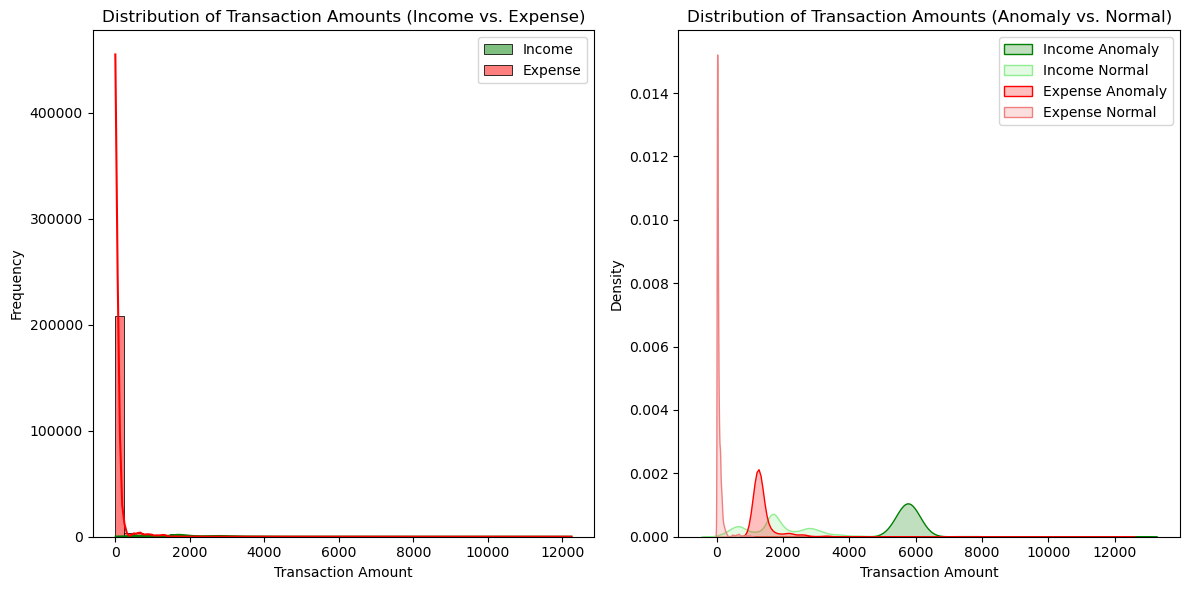

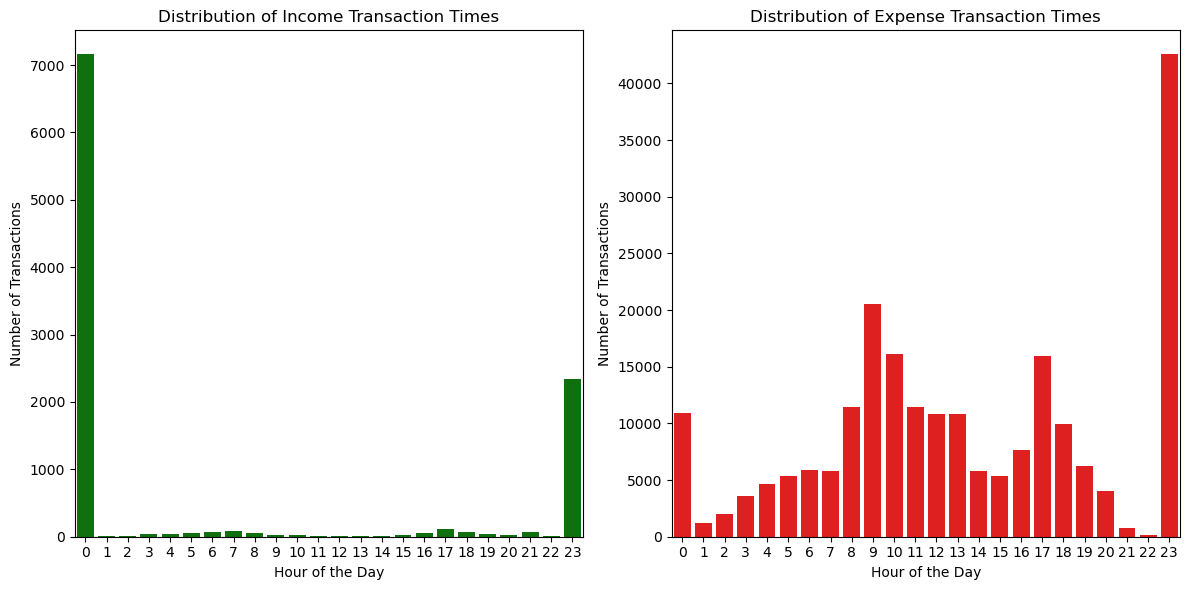

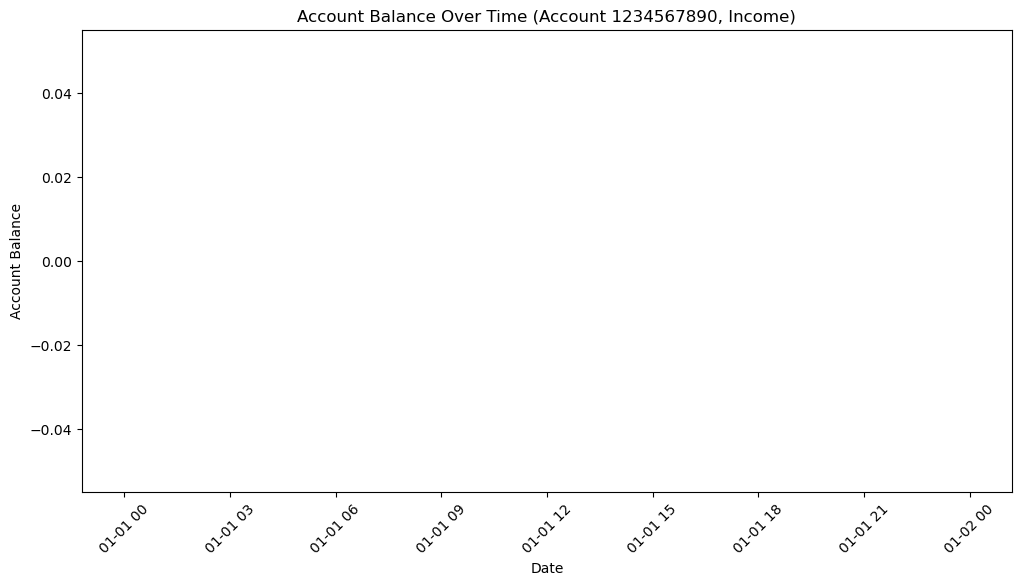

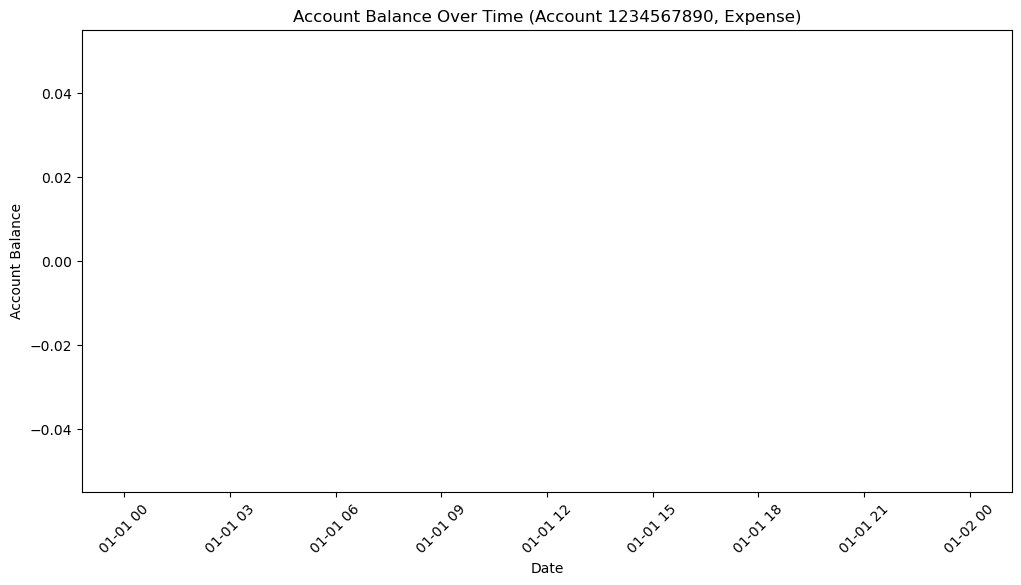

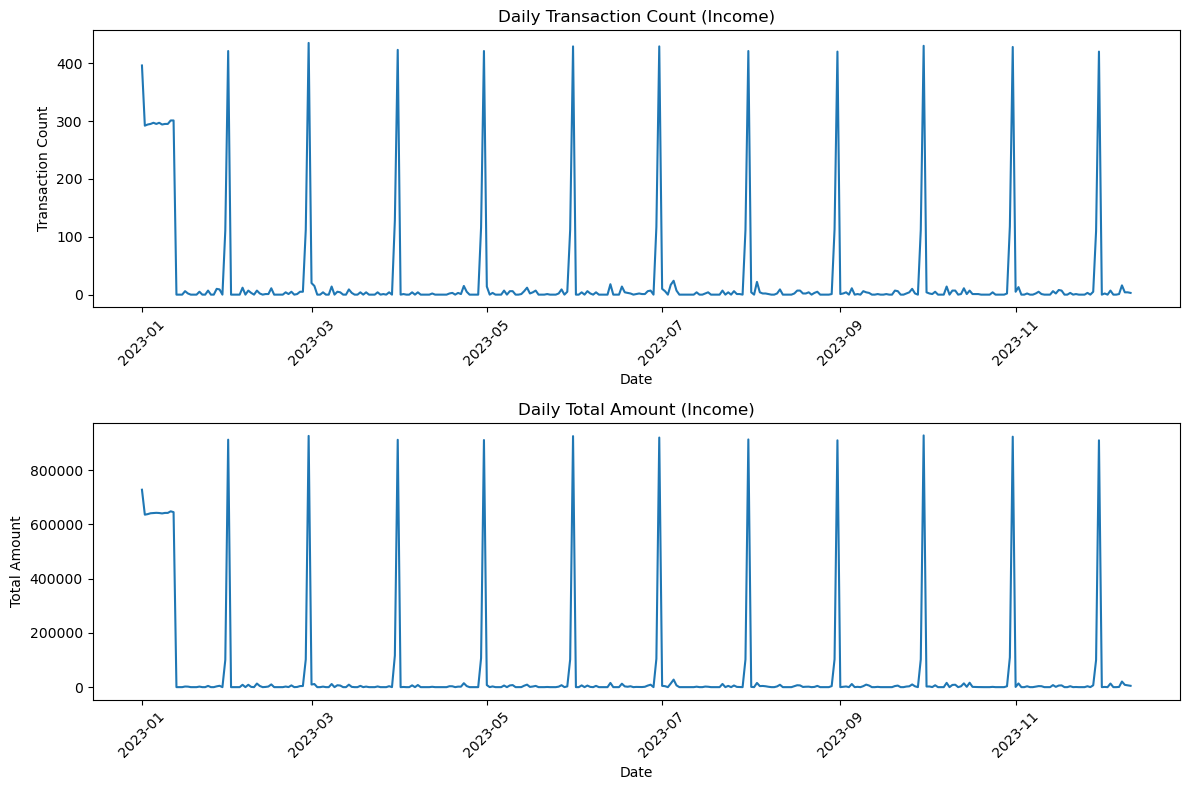

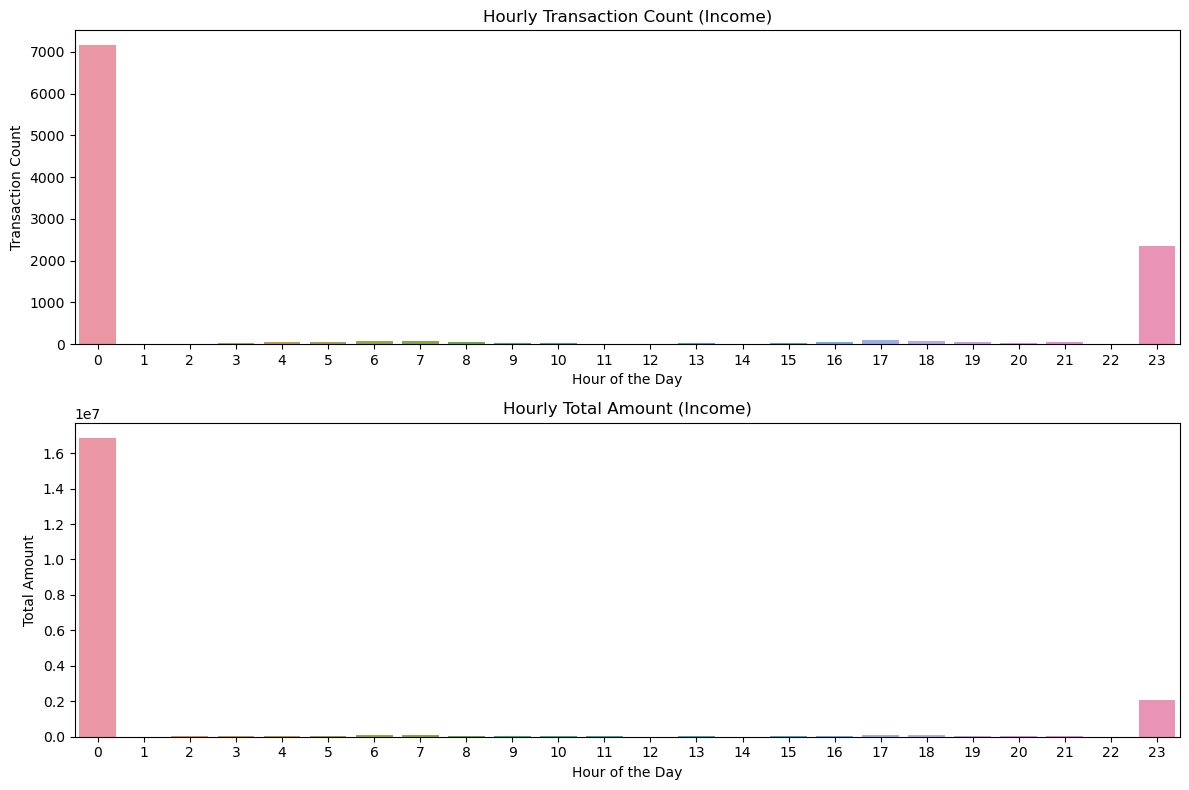

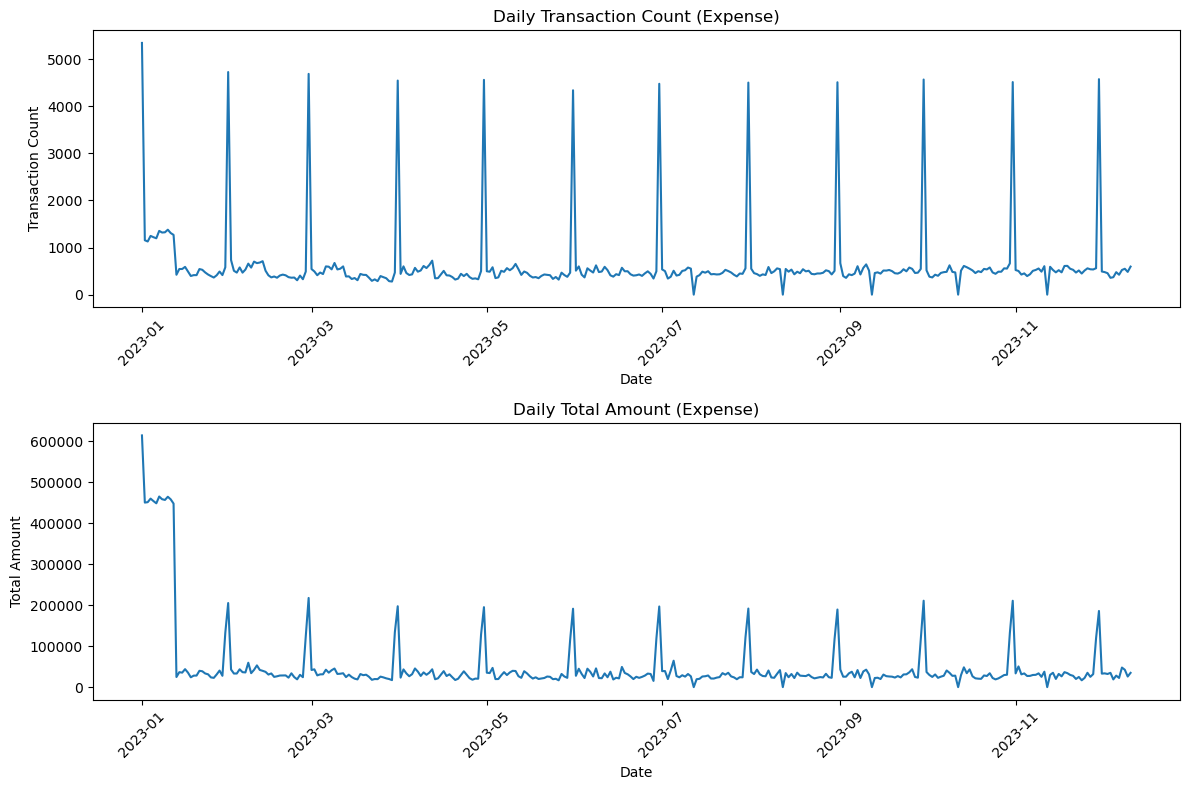

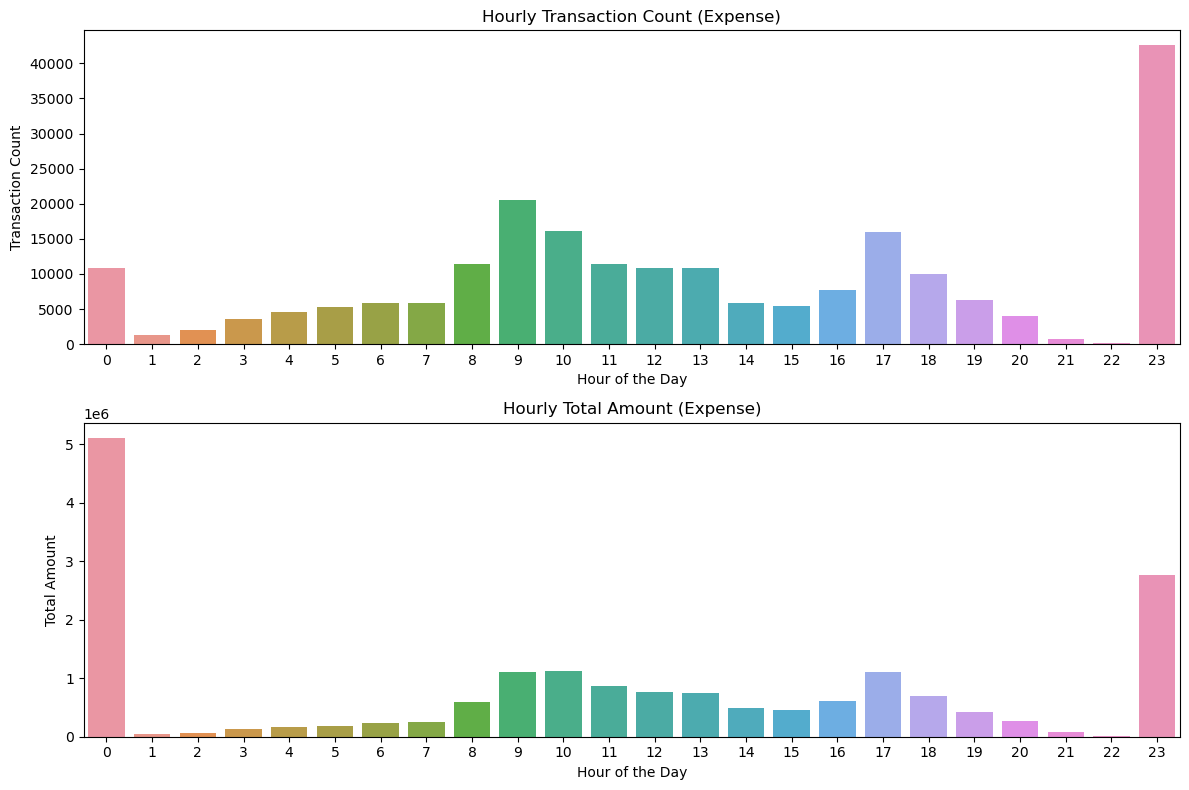

Fraud Prediction Evaluation (Income):
              precision    recall  f1-score   support

          -1       0.43      0.62      0.51        73
           1       1.00      0.99      1.00     10318

    accuracy                           0.99     10391
   macro avg       0.71      0.81      0.75     10391
weighted avg       0.99      0.99      0.99     10391

Confusion Matrix:
[[   45    28]
 [   59 10259]]


Fraud Prediction Evaluation (Expense):
              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      2189
           1       1.00      1.00      1.00    217095

    accuracy                           1.00    219284
   macro avg       0.92      0.92      0.92    219284
weighted avg       1.00      1.00      1.00    219284

Confusion Matrix:
[[  1835    354]
 [   358 216737]]




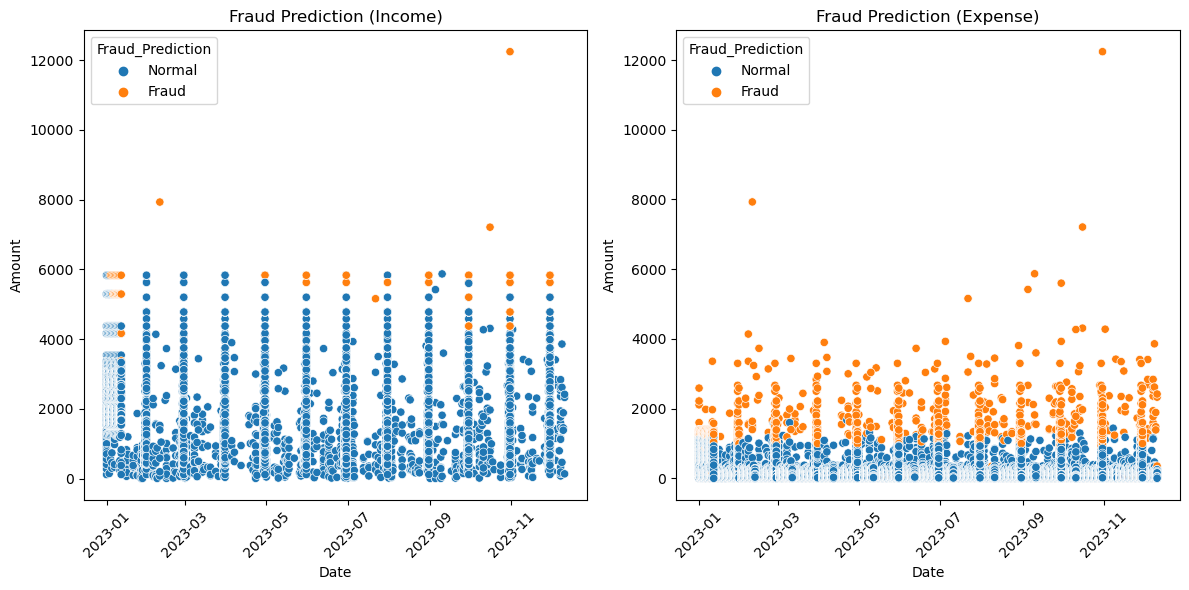

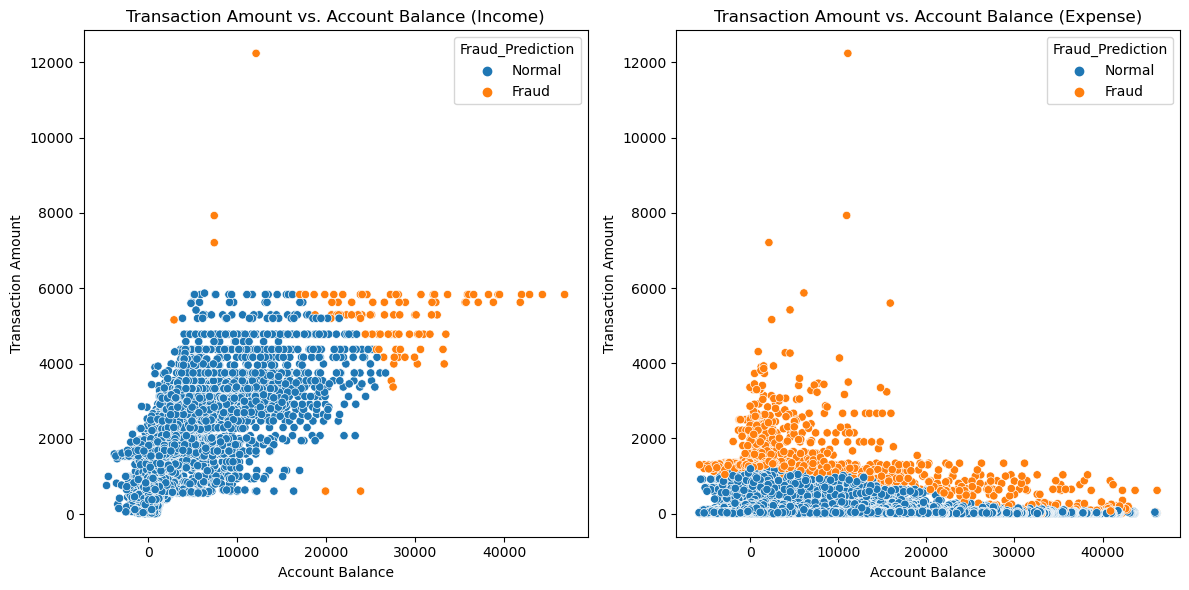

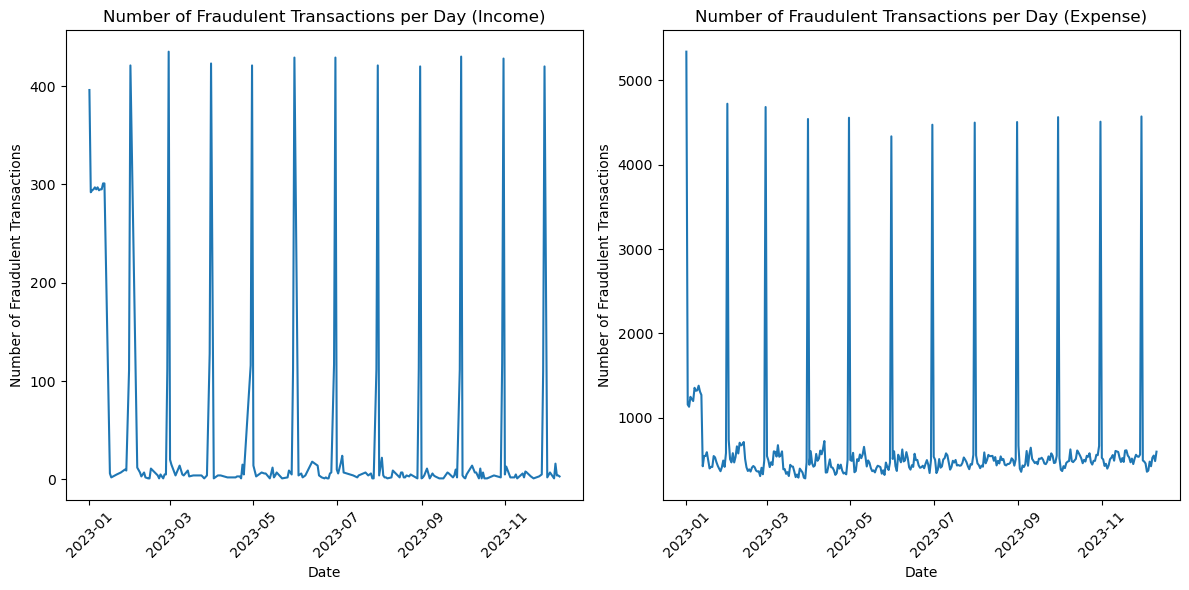

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# 加载收入和支出数据集
income_data = pd.read_csv('income.csv', parse_dates=['Date', 'Timestamp'])
expense_data = pd.read_csv('expense.csv', parse_dates=['Date', 'Timestamp'])

# 数据预处理
income_data['Hour'] = income_data['Timestamp'].dt.hour
expense_data['Hour'] = expense_data['Timestamp'].dt.hour

# 异常交易金额检测
def detect_anomalies(data):
    scaler = StandardScaler()
    amount_scaled = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
    isolation_forest = IsolationForest(contamination=0.01)
    isolation_forest.fit(amount_scaled)
    data['Anomaly'] = isolation_forest.predict(amount_scaled)
    return data

income_data = detect_anomalies(income_data)
expense_data = detect_anomalies(expense_data)

# 可视化部分

# 1. 收入和支出金额分布图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(income_data['Amount'], bins=50, kde=True, color='green', label='Income')
sns.histplot(expense_data['Amount'], bins=50, kde=True, color='red', label='Expense')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts (Income vs. Expense)')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(income_data[income_data['Anomaly'] == -1]['Amount'], label='Income Anomaly', shade=True, color='green')
sns.kdeplot(income_data[income_data['Anomaly'] == 1]['Amount'], label='Income Normal', shade=True, color='lightgreen')
sns.kdeplot(expense_data[expense_data['Anomaly'] == -1]['Amount'], label='Expense Anomaly', shade=True, color='red')
sns.kdeplot(expense_data[expense_data['Anomaly'] == 1]['Amount'], label='Expense Normal', shade=True, color='lightcoral')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Transaction Amounts (Anomaly vs. Normal)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. 收入和支出时间分布图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=income_data['Hour'], color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Income Transaction Times')

plt.subplot(1, 2, 2)
sns.countplot(x=expense_data['Hour'], color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Expense Transaction Times')
plt.tight_layout()
plt.show()

# 3. 账户余额变化图
def plot_account_balance(data, account_id, title):
    account_data = data[data['Account No'] == account_id].sort_values('Date')
    plt.figure(figsize=(12, 6))
    plt.plot(account_data['Date'], account_data['Balance'])
    plt.xlabel('Date')
    plt.ylabel('Account Balance')
    plt.title(f'Account Balance Over Time (Account {account_id}, {title})')
    plt.xticks(rotation=45)
    plt.show()

plot_account_balance(income_data, '1234567890', 'Income')
plot_account_balance(expense_data, '1234567890', 'Expense')

# 4. 交易行为分析
def analyze_transaction_behavior(data, title):
    # 按天汇总交易次数和金额
    daily_transactions = data.groupby(pd.Grouper(key='Date', freq='D')).agg(
        Transaction_Count=('Amount', 'count'),
        Total_Amount=('Amount', 'sum')
    ).reset_index()

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(daily_transactions['Date'], daily_transactions['Transaction_Count'])
    plt.xlabel('Date')
    plt.ylabel('Transaction Count')
    plt.title(f'Daily Transaction Count ({title})')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    plt.plot(daily_transactions['Date'], daily_transactions['Total_Amount'])
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.title(f'Daily Total Amount ({title})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 按小时汇总交易次数和金额
    hourly_transactions = data.groupby(data['Timestamp'].dt.hour).agg(
        Transaction_Count=('Amount', 'count'),
        Total_Amount=('Amount', 'sum')
    ).reset_index()

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    sns.barplot(x='Timestamp', y='Transaction_Count', data=hourly_transactions)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.title(f'Hourly Transaction Count ({title})')

    plt.subplot(2, 1, 2)
    sns.barplot(x='Timestamp', y='Total_Amount', data=hourly_transactions)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Amount')
    plt.title(f'Hourly Total Amount ({title})')
    plt.tight_layout()
    plt.show()

analyze_transaction_behavior(income_data, 'Income')
analyze_transaction_behavior(expense_data, 'Expense')

# 5. 欺诈预测
def predict_fraud(data):
    # 创建特征
    features = data[['Amount', 'Hour', 'Balance']]

    # 训练隔离森林模型
    isolation_forest = IsolationForest(contamination=0.01)
    isolation_forest.fit(features)

    # 预测欺诈交易
    data['Fraud_Prediction'] = isolation_forest.predict(features)
    data['Fraud_Prediction'] = data['Fraud_Prediction'].map({1: 'Normal', -1: 'Fraud'})

    return data

income_data = predict_fraud(income_data)
expense_data = predict_fraud(expense_data)

# 欺诈预测评估
def evaluate_fraud_prediction(data, title):
    print(f"Fraud Prediction Evaluation ({title}):")
    print(classification_report(data['Anomaly'], data['Fraud_Prediction'].map({'Normal': 1, 'Fraud': -1})))
    print("Confusion Matrix:")
    print(confusion_matrix(data['Anomaly'], data['Fraud_Prediction'].map({'Normal': 1, 'Fraud': -1})))
    print("\n")

evaluate_fraud_prediction(income_data, 'Income')
evaluate_fraud_prediction(expense_data, 'Expense')

# 欺诈交易可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='Amount', hue='Fraud_Prediction', data=income_data)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Fraud Prediction (Income)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='Amount', hue='Fraud_Prediction', data=expense_data)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Fraud Prediction (Expense)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 交易金额与账户余额关系图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Balance', y='Amount', hue='Fraud_Prediction', data=income_data)
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Account Balance (Income)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Balance', y='Amount', hue='Fraud_Prediction', data=expense_data)
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Account Balance (Expense)')
plt.tight_layout()
plt.show()

# 7. 每日欺诈交易次数
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
income_data['Date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions per Day (Income)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
expense_data['Date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions per Day (Expense)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Income_Expense,Merchant Category
0,01/01/2023,0:00,678330503.0,2971.00,1584.00,0.0,Westport Care Home,Income,Healthcare
1,01/01/2023,0:00,472213568.0,3792.00,1950.00,0.0,Barbiee Boutique,Income,Retail/Shopping
2,01/01/2023,0:00,472213568.0,3012.00,-780.00,283027736.0,0,Expense,Others
3,01/01/2023,0:00,283027736.0,1787.00,780.00,472213568.0,0,Income,Others
4,01/01/2023,0:00,624500124.0,3226.00,1825.00,0.0,Fat Face,Income,Retail/Shopping
...,...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.21,-41.06,0.0,Tesco,Expense,Others
230592,06/12/2023,20:55,786141370.0,-244.84,-62.35,0.0,Sainsbury Local,Expense,Retail/Shopping
230593,06/12/2023,21:05,824916823.0,9709.17,-32.94,0.0,Deliveroo,Expense,Food/Dining
230594,06/12/2023,21:13,366550080.0,26834.17,-19.25,0.0,Amazon,Expense,Online Retail
